### <h1> Task 1 <h1> (Поиск минимума/максимума в векторе)

In [29]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot
from doExperiments import DoExperiments

In [30]:
from pathlib import Path
import os

PATH_TO_MPI = Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_minmax.exe")
FILE_NAME = Path('data/OpenMPI/minmax_mpi.csv')

if not os.path.exists(FILE_NAME):
    exp = DoExperiments(exe_path=PATH_TO_MPI, args_in_right_order=[1.0, 1000.0])
    exp.run(filename=FILE_NAME)
else:
    print(f"File '{FILE_NAME}' already exists. Skipping function execution.")

File 'data\OpenMPI\minmax_mpi.csv' already exists. Skipping function execution.


In [31]:
data_mp = pd.read_csv('data/OpenMP/minmax_mp.csv')
data_mpi = pd.read_csv('data/OpenMPI/minmax_mpi.csv')
display(data_mp)
display(data_mpi)

,Num_Threads,Iter,Time
0,1,10,41
1,2,10,34
2,3,10,40
3,4,10,36
4,5,10,36
...,...,...,...
91,12,1000000,3703
92,13,1000000,3347
93,14,1000000,3361
94,15,1000000,3181


,Num_Threads,Iter,Time
0,1,10,26.1
1,2,10,828.6
2,3,10,720.1
3,4,10,1298.6
4,5,10,1188.4
...,...,...,...
91,12,1000000,5381.2
92,13,1000000,6469.8
93,14,1000000,7063.9
94,15,1000000,6186.1


In [32]:
labels = ['OpenMP', 'OpenMPI']

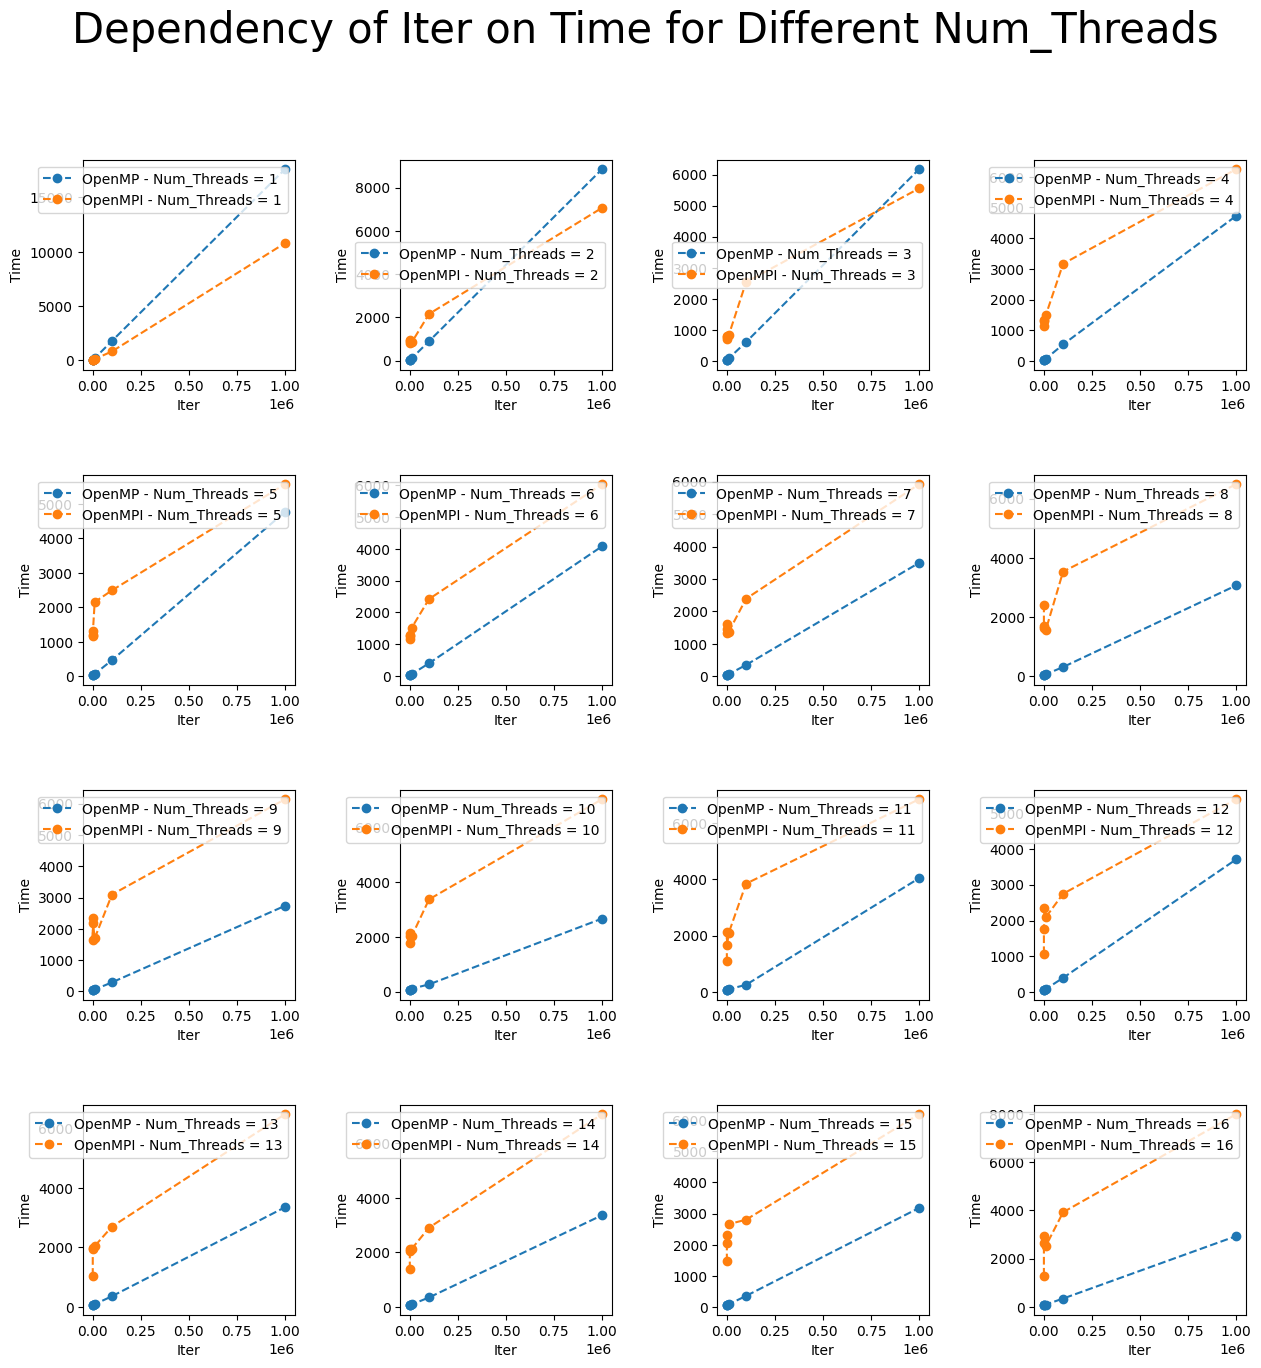

In [33]:
thread_groups_mp = data_mp.groupby('Num_Threads')
thread_groups_mpi = data_mpi.groupby('Num_Threads')

thread_groups = [thread_groups_mp, thread_groups_mpi]
time_iter_plot(thread_groups, labels)

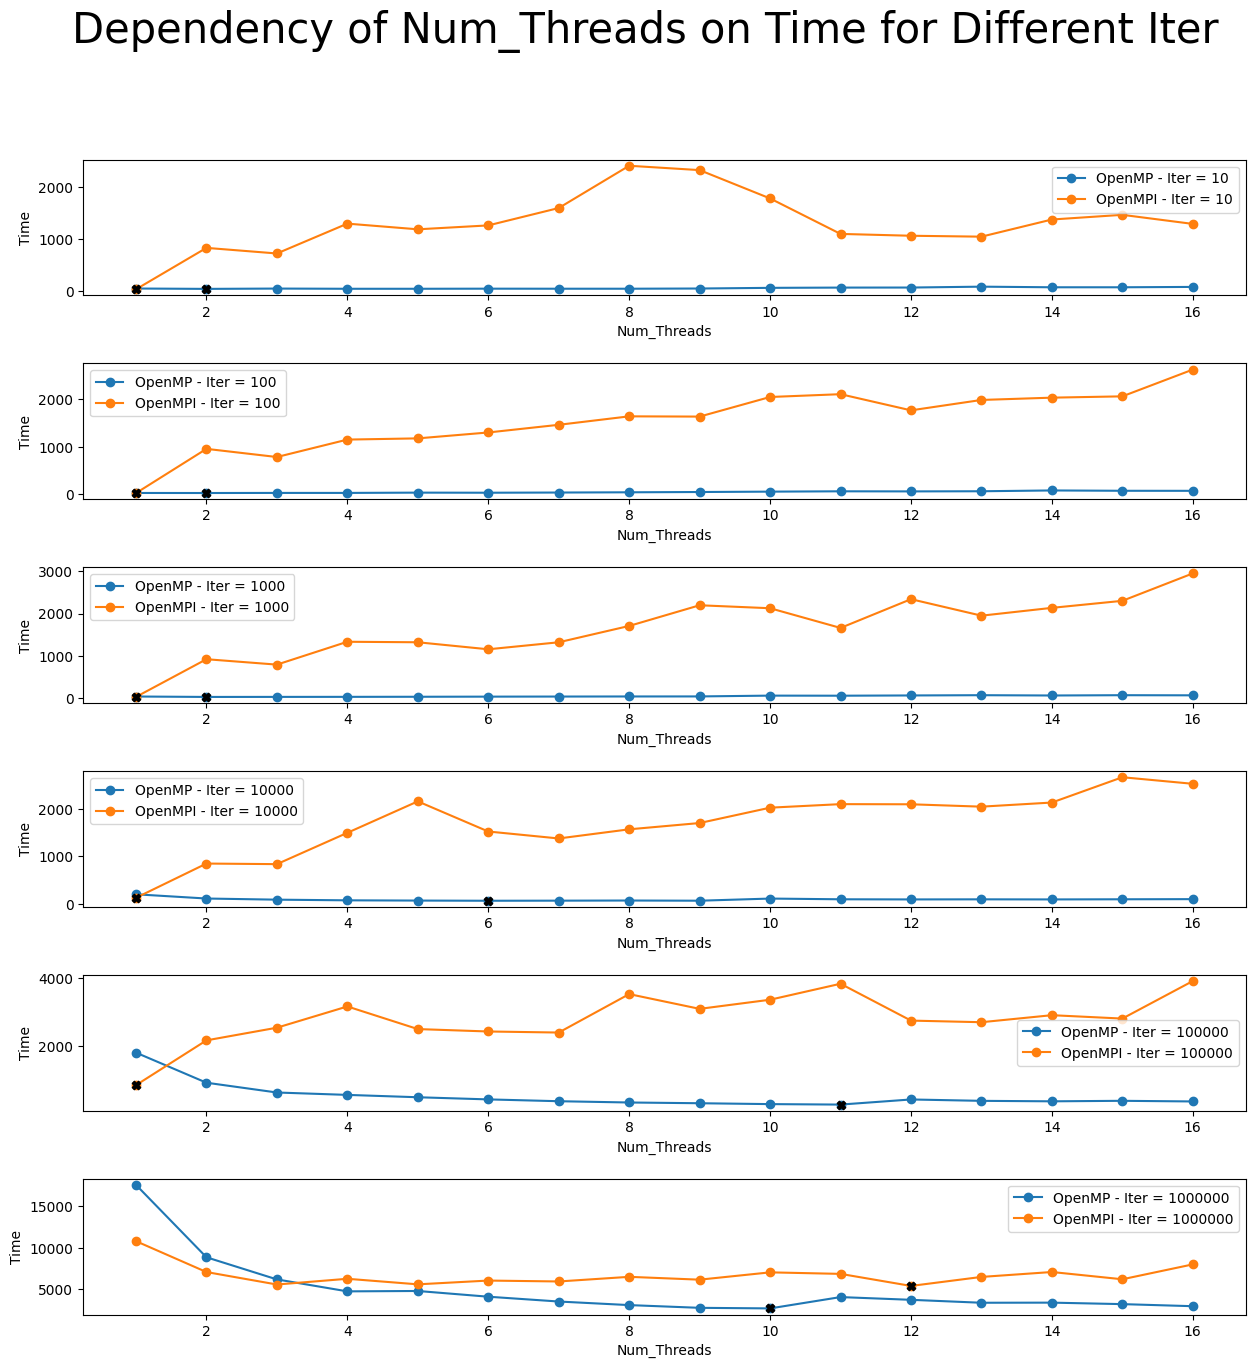

In [34]:
iter_groups_mp = data_mp.groupby('Iter', as_index=False)
iter_groups_mpi = data_mpi.groupby('Iter', as_index=False)

iter_groups = [iter_groups_mp, iter_groups_mpi]
time_thread_plot(iter_groups, labels)

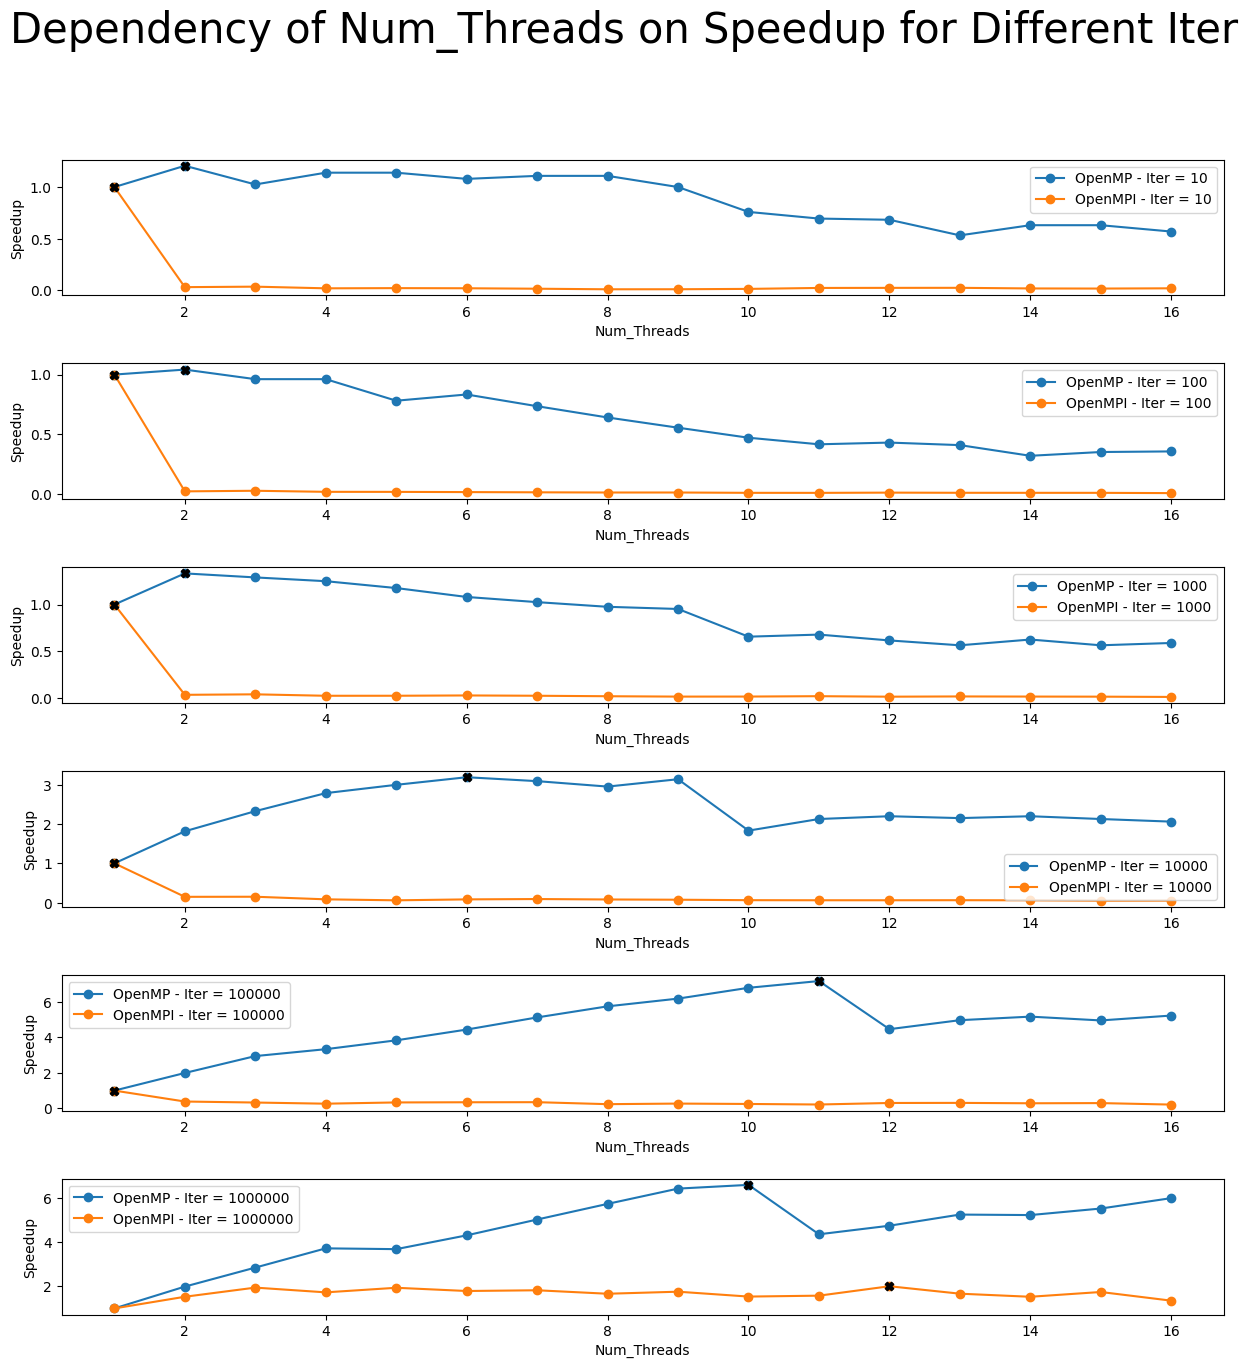

In [35]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно сделать вывод, что OpenMPI проигрывает OpenMP по производительности. Но стоит сделать важные замечания:
1. Num_Threads(MPI) это не одно и то же что Num_Threads(MP).
2. Задача поиска минимума в векторе считается легковесной.
3. Все вычисления происходили на одной вычислительной машине.
4. С увеличением кол-ва итераций разность между производительностью падает.

***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 